In [1]:
from sklearn import datasets, svm
import matplotlib.pyplot as plt

digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
x = digits.data
y = digits.target

In [16]:
import pandas as pd
df = pd.DataFrame(data = y, columns = ['targets'])
df

,targets
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [19]:
x.shape

(1797, 64)

In [20]:
y.shape

(1797,)

In [21]:
# DATA VISUALIZATION
digits.images.shape

(1797, 8, 8)

In [22]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

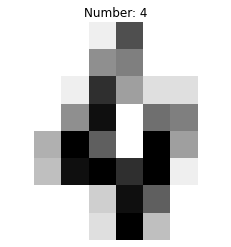

In [57]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[4], cmap = plt.cm.gray_r)
plt.axis('off')
plt.title('Number: ' + str(y[4]))
None

In [ ]:
# set up the plot
figure, axes = plt.subplots(3,10, figsize = (15,6))

for ax, image,number in zip(axes,ravel(), digits.images, y):  # iteration of over 30 axes objects, the first 30 images in digits.images
    ax.axis('off')
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title('Number: ' + str(number))

In [87]:
# dividing into training and testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/3 ,random_state=99, stratify = y)


In [88]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(599,)

In [72]:
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
# Make prediction
y_pred = knn.predict(x_test)
y_pred

array([2, 3, 2, 0, 3, 0, 6, 4, 5, 7, 2, 0, 6, 0, 1, 5, 6, 8, 1, 6, 3, 6,
       8, 3, 5, 1, 3, 9, 1, 2, 4, 2, 6, 0, 5, 0, 3, 1, 3, 7, 9, 3, 8, 2,
       4, 4, 8, 7, 8, 1, 7, 3, 8, 0, 5, 5, 6, 6, 0, 4, 1, 6, 4, 6, 3, 8,
       6, 1, 6, 0, 6, 3, 5, 7, 0, 6, 1, 9, 3, 6, 2, 9, 3, 4, 1, 5, 5, 2,
       1, 5, 5, 0, 7, 0, 7, 7, 6, 9, 8, 4, 6, 9, 1, 4, 0, 5, 6, 8, 2, 5,
       2, 2, 7, 0, 5, 1, 2, 9, 9, 2, 3, 9, 5, 2, 9, 0, 0, 0, 9, 5, 5, 2,
       8, 9, 4, 4, 4, 8, 7, 5, 9, 0, 4, 4, 2, 1, 4, 0, 7, 3, 1, 5, 7, 7,
       8, 1, 5, 8, 3, 6, 6, 1, 7, 0, 6, 9, 3, 1, 9, 3, 8, 2, 8, 4, 9, 2,
       0, 5, 0, 6, 1, 1, 2, 6, 7, 9, 7, 5, 7, 5, 6, 0, 5, 7, 1, 4, 4, 5,
       0, 9, 1, 9, 3, 3, 6, 4, 7, 9, 9, 4, 4, 9, 5, 1, 3, 3, 1, 2, 2, 9,
       1, 9, 6, 4, 3, 7, 7, 0, 9, 2, 8, 4, 9, 0, 2, 9, 2, 3, 7, 1, 7, 8,
       5, 7, 0, 8, 4, 7, 7, 7, 0, 3, 1, 7, 0, 7, 7, 2, 8, 5, 1, 5, 5, 9,
       3, 0, 0, 3, 9, 4, 9, 0, 6, 1, 3, 3, 7, 8, 1, 4, 0, 7, 1, 7, 2, 6,
       5, 5, 0, 0, 7, 8, 6, 0, 6, 4, 0, 5, 4, 7, 5,

In [74]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.98      0.97        61
           2       1.00      0.98      0.99        59
           3       1.00      0.98      0.99        61
           4       1.00      1.00      1.00        60
           5       0.97      0.98      0.98        61
           6       1.00      1.00      1.00        60
           7       0.97      1.00      0.98        60
           8       1.00      0.95      0.97        58
           9       0.98      0.98      0.98        60

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599



In [75]:
# Evaluate the results by looking at the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
confusion

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 59]], dtype=int64)

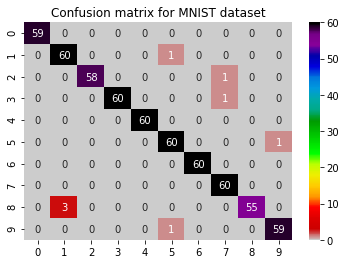

In [80]:
import seaborn as sns
s = sns.heatmap(confusion, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Confusion matrix for MNIST dataset')
None

In [84]:
# Getting specific performance
# calculate the overall accuracy using knn.score
acc = knn.score(x_test, y_test)
print(f'accuracy from metrics.accuracy_score = {acc:.4}')# {acc:.4} will have 4 digits after decimal.

accuracy from metrics.accuracy_score = 0.9866


In [85]:
# calculate the overall accuracy using metrics.accuracy_score
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f'accuracy from metrics.accuracy_score = {acc:.4}')

accuracy from metrics.accuracy_score = 0.9866


In [ ]:
# Conclusion
# accuracy from metrics.accuracy_score = 0.9866
# the overall accuracy using metrics.accuracy_score = 0.9866
# KNeighborsClassifier is best for the Optical recognition of handwritten digits dataset
--------------------------------------